In [15]:
# Data processing packages
import numpy as np
import pandas as pd
from collections import Counter

# Machine learning packages
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MultiLabelBinarizer, FunctionTransformer
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE, SelectPercentile, chi2, mutual_info_regression, SelectFromModel
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

import torch
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Others
import time
from pathlib import Path

Using TensorFlow backend.


## 5. Models

In [16]:
X1_pca = torch.load('X1_pca').to_numpy()
X1_ica = torch.load('X1_ica').to_numpy()
X1_tsne = torch.load('X1_tsne').to_numpy()
Y1 = pd.read_csv("Y1.csv", header=None, names=['revenue ']).to_numpy().ravel()
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X1_pca, Y1, random_state=42, test_size=0.1)
X_train_ica, X_test_ica, _, _ = train_test_split(X1_ica, Y1, random_state=42, test_size=0.1)
X_train_tsne, X_test_tsne, _, _ = train_test_split(X1_tsne, Y1, random_state=42, test_size=0.1)

### 5.3 MLP

In [77]:
model = Sequential()

model.add(Dense(200, input_shape = (227, )))
model.add(Activation('relu'))
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dense(1))
# model.add(Activation('relu'))
# model.add(Dense(25))
# model.add(Activation('relu'))
# model.add(Dense(10))
# model.add(Activation('relu'))
# model.add(Dense(1))
# model.add(Activation('relu'))
# model.add(Dense(50, kernel_initializer='he_normal'))
# model.add(Activation('relu'))
# model.add(Dense(25, kernel_initializer='he_normal'))
# model.add(Activation('relu'))
# model.add(Dense(10, kernel_initializer='he_normal'))
# model.add(Activation('relu'))
# model.add(Dense(5, kernel_initializer='he_normal'))
# model.add(Activation('relu'))
# model.add(Dense(1, kernel_initializer='he_normal'))

sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])

In [78]:
history = model.fit(X_train_pca, np.log(1 + y_train), batch_size = 177, validation_split = 0.2, epochs = 300, verbose = 2)

Train on 2548 samples, validate on 638 samples
Epoch 1/300
 - 1s - loss: 138.6279 - mse: 138.6279 - val_loss: 69.7526 - val_mse: 69.7526
Epoch 2/300
 - 0s - loss: 32.1010 - mse: 32.1010 - val_loss: 16.0924 - val_mse: 16.0924
Epoch 3/300
 - 0s - loss: 13.9202 - mse: 13.9202 - val_loss: 10.0496 - val_mse: 10.0496
Epoch 4/300
 - 0s - loss: 8.4978 - mse: 8.4978 - val_loss: 9.6156 - val_mse: 9.6156
Epoch 5/300
 - 0s - loss: 7.2859 - mse: 7.2859 - val_loss: 8.7133 - val_mse: 8.7133
Epoch 6/300
 - 0s - loss: 6.5662 - mse: 6.5662 - val_loss: 8.8042 - val_mse: 8.8042
Epoch 7/300
 - 0s - loss: 6.0409 - mse: 6.0409 - val_loss: 8.6038 - val_mse: 8.6038
Epoch 8/300
 - 0s - loss: 5.6410 - mse: 5.6410 - val_loss: 8.4496 - val_mse: 8.4496
Epoch 9/300
 - 0s - loss: 5.2677 - mse: 5.2677 - val_loss: 8.4624 - val_mse: 8.4624
Epoch 10/300
 - 0s - loss: 4.9275 - mse: 4.9275 - val_loss: 8.3457 - val_mse: 8.3457
Epoch 11/300
 - 0s - loss: 4.6070 - mse: 4.6070 - val_loss: 8.2563 - val_mse: 8.2563
Epoch 12/300


KeyboardInterrupt: 

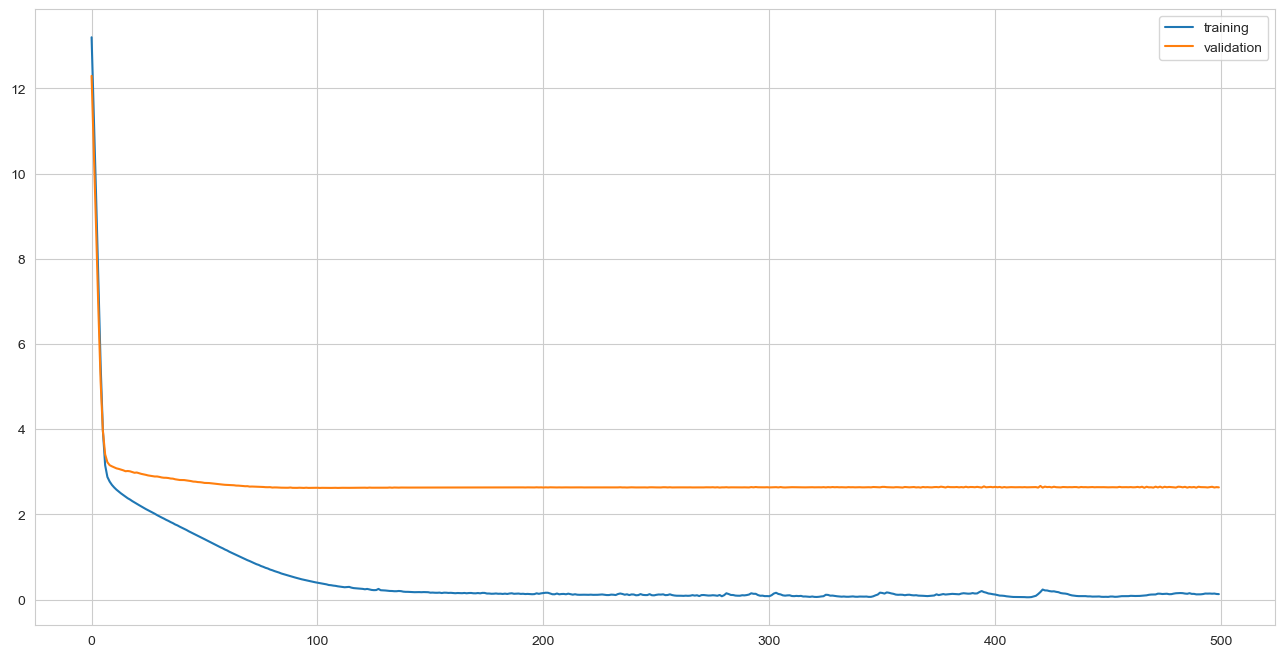

In [66]:
plt.figure(figsize=(16, 8))
plt.plot(np.sqrt(history.history['mse']))
plt.plot(np.sqrt(history.history['val_mse']))
plt.legend(['training', 'validation'])
plt.show()

In [12]:
mlp_grid_pca = GridSearchCV(mlp, mlp_parameter_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True,verbose=2)
mlp_grid_ica = GridSearchCV(mlp, mlp_parameter_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True,verbose=2)
mlp_grid_tsne = GridSearchCV(mlp, mlp_parameter_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True,verbose=2)

In [13]:
mlp_grid_ica.fit(X_train_ica, np.log(1 + y_train))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END activation=relu, alpha=0.0001, batch_size=177, hidden_layer_sizes=(500,), learning_rate=constant, solver=adam; total time=  22.3s
[CV] END activation=relu, alpha=0.0001, batch_size=177, hidden_layer_sizes=(500,), learning_rate=constant, solver=adam; total time=  17.8s
[CV] END activation=relu, alpha=0.0001, batch_size=177, hidden_layer_sizes=(500,), learning_rate=constant, solver=adam; total time=  18.8s
[CV] END activation=relu, alpha=0.0001, batch_size=177, hidden_layer_sizes=(500,), learning_rate=constant, solver=adam; total time=  17.8s
[CV] END activation=relu, alpha=0.0001, batch_size=177, hidden_layer_sizes=(500,), learning_rate=constant, solver=adam; total time=  18.2s


GridSearchCV(cv=5,
             estimator=MLPRegressor(max_iter=1000, random_state=42, verbose=0),
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'batch_size': [177], 'hidden_layer_sizes': [(500,)],
                         'learning_rate': ['constant'], 'solver': ['adam']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [14]:
print("The best parameters are:", mlp_grid_ica.best_params_)
print("The best RMSE is:", mlp_grid_ica.best_score_)

The best parameters are: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 177, 'hidden_layer_sizes': (500,), 'learning_rate': 'constant', 'solver': 'adam'}
The best RMSE is: -2.3769128301792626


In [ ]:
mlp_grid_tsne.fit(X_train_tsne, np.log(1 + y_train))

In [ ]:
print("The best parameters are:", mlp_grid_tsne.best_params_)
print("The best RMSE is:", mlp_grid_tsne.best_score_)